In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors

In [300]:
import matplotlib.pyplot as plt

In [2]:
import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [4]:


df_data_1 = pd.read_csv(r'C:\Users\prateekspawar\Downloads\Capstone-project-master\ny.csv')
df_data_1.head()

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,0,Bronx,Wakefield,40.894705,-73.847201
1,1,Bronx,Co-op City,40.874294,-73.829939
2,2,Bronx,Eastchester,40.887556,-73.827806
3,3,Bronx,Fieldston,40.895437,-73.905643
4,4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
ny=df_data_1[['Neighborhood','Latitude','Longitude']]

In [6]:
ny.head()

,Neighborhood,Latitude,Longitude
0,Wakefield,40.894705,-73.847201
1,Co-op City,40.874294,-73.829939
2,Eastchester,40.887556,-73.827806
3,Fieldston,40.895437,-73.905643
4,Riverdale,40.890834,-73.912585


In [7]:



df_data_2 = pd.read_csv(r'C:\Users\prateekspawar\Downloads\Capstone-project-master\toronto.csv')
df_data_2.head()


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [8]:
tor=df_data_2[['Neighborhood','Latitude','Longitude']]

In [9]:
tor.head()

,Neighborhood,Latitude,Longitude
0,Parkwoods,43.753259,-79.329656
1,Victoria Village,43.725882,-79.315572
2,Harbourfront,43.654260,-79.360636
3,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,Queen's Park,43.662301,-79.389494


In [10]:
# @hidden_cell
CLIENT_ID = 'AXE4DF54GS4ZXVV3SOJIVZB01DGQQE0ZQRKDFIHHK5IEO0RP' # your Foursquare ID
CLIENT_SECRET = 'KSDWQUELFC0EZDQV2ICYQR4YBS5GWCE3ZBRL1TAJIVPJPHIJ' # your Foursquare Secret
VERSION = '20181226' # Foursquare API version

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius 
            )
            
        # make the GET request
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['distance'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue distance',
                  'Venue Category']
    
    return(nearby_venues)

In [12]:

ny_venues = getNearbyVenues(names=ny['Neighborhood'],
                                   latitudes=ny['Latitude'],
                                   longitudes=ny['Longitude']
                                  )


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

KeyError: 'groups'

In [124]:
ny_venues=pd.read_csv(r'C:\Users\prateekspawar\Downloads\Capstone-project-master\ny_venues.csv')

In [125]:
ny_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue distance,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,127,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,798,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Ali's Roti Shop,822,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,686,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Carvel Ice Cream,483,Ice Cream Shop


In [23]:
tor_venues = getNearbyVenues(names=tor['Neighborhood'],
                                   latitudes=tor['Latitude'],
                                   longitudes=tor['Longitude']
                                  )


Parkwoods
Victoria Village
Harbourfront
Lawrence Heights,Lawrence Manor
Queen's Park
Queen's Park
Rouge,Malvern
Don Mills North
Woodbine Gardens,Parkview Hill
Ryerson,Garden District
Glencairn
Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park
Highland Creek,Rouge Hill,Port Union
Flemingdon Park,Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe
Guildwood,Morningside,West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor,Downsview North,Wilson Heights
Thorncliffe Park
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Scarborough Village
Fairview,Henry Farm,Oriole
Northwood Park,York University
East Toronto
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
East Birchmount Park,Ionview,Kennedy Park
Bayview Village
CFB Toronto,Downsview East
The Danforth West,Riverdale
Design Exchange,Toronto 

In [126]:
tor_venues=pd.read_csv(r'C:\Users\prateekspawar\Downloads\Capstone-project-master\tor_venues.csv')

In [127]:
tor_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue distance,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,833,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,245,Park
2,Parkwoods,43.753259,-79.329656,Tim Hortons,866,Café
3,Parkwoods,43.753259,-79.329656,A&W Canada,852,Fast Food Restaurant
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,889,Grocery Store


Lets define Diffrent types of categories according to Foursquare documentation:
<pre>
1.Arts & Entertainment
2.College & university
3.Event
4.Food
5.Nightlife Spot
6.Outdoors & Recreation
7.Professional & Other Places
8.school
9.Residense
10.Shop & Service
11.Travel & Transport
</pre>

Now define a list of category names under each type

In [18]:
c1=['Arts & Entertainment','Amphitheater','Aquarium','Arcade','Art Gallery','Bowling Alley','Casino','Circus','Comedy Club', \
   'Concert Hall','Country Dance Club','Disc Golf','Exhibit','General Entertainment','Go Kart Track','Historic Site','Karaoke Box', \
   'Laser Tag','Memorial Site','Mini Golf','Movie Theater','Drive-in Theater','Indie Movie Theater','Multiplex','Museum' ,\
   'Art Museum','Erotic Museum','History Museum','Planetarium','Science Museum','Music Venue','Jazz Club','Piano Bar','Rock Club' ,\
   'Pachinko Parlor','Performing Arts Venue','Dance Studio','Indie Theater','Opera House','Theater','Pool Hall','Public Art' ,\
   'Outdoor Sculpture','Street Art','Racecourse','Racetrack','Roller Rink','Salsa Club','Samba School','Stadium','Baseball Stadium', \
   'Basketball Stadium','Cricket Ground','Football Stadium','Hockey Arena','Rugby Stadium','Soccer Stadium','Tennis Stadium','Track Stadium', \
   'Theme Park Ride / Attraction','Tour Provider','Water Park','Zoo','Zoo Exhibit']

In [19]:
c2=['College & University','College Academic Building','College Arts Building','College Communications Building','College Engineering Building', \
   'College History Building','College Math Building','College Science Building','College Technology Building','College Administrative Building', \
   'College Auditorium','College Bookstore','College Cafeteria','College Classroom','College Gym','College Lab','College Library','College Quad' ,\
   'College Rec Center','College Residence Hall','College Stadium','College Baseball Diamond','College Basketball Court','College Cricket Pitch', \
   'College Football Field','College Hockey Rink','College Soccer Field','College Tennis Court','College Track','College Theater','Community College', \
   'Fraternity House','General College & University','Law School','Medical School','Sorority House','Student Center','Trade School','University']

In [20]:
c3=['Event','Christmas Market','Conference','Convention','Festival','Line / Queue','Music Festival','Other Event','Parade', \
   'Sporting Event','Stoop Sale','Street Fair','Trade Fair']

In [22]:
c4=['Food','Afghan Restaurant','African Restaurant','Ethiopian Restaurant','American Restaurant','New American Restaurant', \
   'Asian Restaurant','Burmese Restaurant','Cambodian Restaurant','Chinese Restaurant','Anhui Restaurant','Beijing Restaurant', \
   'Cantonese Restaurant','Cha Chaan Teng','Chinese Aristocrat Restaurant','Chinese Breakfast Place','Dim Sum Restaurant' ,\
   'Dongbei Restaurant','Fujian Restaurant','Guizhou Restaurant','Hainan Restaurant','Hakka Restaurant','Henan Restaurant', \
   'Hong Kong Restaurant','Huaiyang Restaurant','Hubei Restaurant','Hunan Restaurant','Imperial Restaurant','Jiangsu Restaurant' ,\
   'Jiangxi Restaurant','Macanese Restaurant','Manchu Restaurant','Peking Duck Restaurant','Shaanxi Restaurant','Shandong Restaurant' ,\
   'Shanghai Restaurant','Shanxi Restaurant','Szechuan Restaurant','Taiwanese Restaurant','Tianjin Restaurant','Xinjiang Restaurant', \
   'Yunnan Restaurant','Zhejiang Restaurant','Filipino Restaurant','Himalayan Restaurant','Hotpot Restaurant','Indonesian Restaurant', \
   'Acehnese Restaurant','Balinese Restaurant','Betawinese Restaurant','Indonesian Meatball Place','Javanese Restaurant', \
   'Manadonese Restaurant','Padangnese Restaurant','Sundanese Restaurant','Japanese Restaurant','Donburi Restaurant', \
   'Japanese Curry Restaurant','Kaiseki Restaurant','Kushikatsu Restaurant','Monjayaki Restaurant','Nabe Restaurant','Okonomiyaki Restaurant', \
   'Ramen Restaurant','Shabu-Shabu Restaurant','Soba Restaurant','Sukiyaki Restaurant','Sushi Restaurant','Takoyaki Place', \
   'Tempura Restaurant','Tonkatsu Restaurant','Udon Restaurant','Unagi Restaurant','Wagashi Place','Yakitori Restaurant', \
   'Yoshoku Restaurant','Korean Restaurant','Bossam/Jokbal Restaurant','Bunsik Restaurant','Gukbap Restaurant','Janguh Restaurant', \
   'Samgyetang Restaurant','Malay Restaurant','Mamak Restaurant','Mongolian Restaurant','Noodle House','Satay Restaurant', \
   'Thai Restaurant','Som Tum Restaurant','Tibetan Restaurant','Vietnamese Restaurant','Australian Restaurant','Austrian Restaurant', \
   'BBQ Joint','Bagel Shop','Bakery','Belgian Restaurant','Bistro','Breakfast Spot','Bubble Tea Shop','Buffet','Burger Joint', \
   'Cafeteria','Café','Cajun / Creole Restaurant','Caribbean Restaurant','Cuban Restaurant','Caucasian Restaurant','Coffee Shop', \
   'Comfort Food Restaurant','Creperie','Czech Restaurant','Deli / Bodega','Dessert Shop','Cupcake Shop','Frozen Yogurt Shop', \
   'Ice Cream Shop','Pastry Shop','Pie Shop','Diner','Donut Shop','Dumpling Restaurant','Dutch Restaurant','Eastern European Restaurant', \
   'Belarusian Restaurant','Bosnian Restaurant','Bulgarian Restaurant','Romanian Restaurant','Tatar Restaurant','English Restaurant', \
   'Falafel Restaurant','Fast Food Restaurant','Fish & Chips Shop','Fondue Restaurant','Food Court','Food Stand','Food Truck', \
   'French Restaurant','Alsatian Restaurant','Auvergne Restaurant','Basque Restaurant','Brasserie','Breton Restaurant','Burgundian Restaurant',\
   'Catalan Restaurant',"Ch'ti Restaurant",'Corsican Restaurant','Estaminet','Labour Canteen','Lyonese Bouchon','Norman Restaurant',\
   'Provençal Restaurant','Savoyard Restaurant','Southwestern French Restaurant','Fried Chicken Joint','Friterie','Gastropub', \
   'German Restaurant','Apple Wine Pub','Bavarian Restaurant','Bratwurst Joint','Currywurst Joint','Franconian Restaurant', \
   'German Pop-Up Restaurant','Palatine Restaurant','Rhenisch Restaurant','Schnitzel Restaurant','Silesian Restaurant', \
   'Swabian Restaurant','Gluten-free Restaurant','Greek Restaurant','Bougatsa Shop','Cretan Restaurant','Fish Taverna', \
   'Grilled Meat Restaurant','Kafenio','Magirio','Meze Restaurant','Modern Greek Restaurant','Ouzeri','Patsa Restaurant', \
   'Souvlaki Shop','Taverna','Tsipouro Restaurant','Halal Restaurant','Hawaiian Restaurant','Poke Place','Hot Dog Joint','Hungarian Restaurant', \
   'Indian Restaurant','Andhra Restaurant','Awadhi Restaurant','Bengali Restaurant','Chaat Place','Chettinad Restaurant', \
   'Dhaba','Dosa Place','Goan Restaurant','Gujarati Restaurant','Hyderabadi Restaurant','Indian Chinese Restaurant', \
   'Indian Sweet Shop','Irani Cafe','Jain Restaurant','Karnataka Restaurant','Kerala Restaurant','Maharashtrian Restaurant', \
   'Mughlai Restaurant','Multicuisine Indian Restaurant','North Indian Restaurant','Northeast Indian Restaurant', \
   'Parsi Restaurant','Punjabi Restaurant','Rajasthani Restaurant','South Indian Restaurant','Udupi Restaurant','Irish Pub', \
   'Italian Restaurant','Abruzzo Restaurant','Agriturismo','Aosta Restaurant','Basilicata Restaurant','Calabria Restaurant', \
   'Campanian Restaurant','Emilia Restaurant','Friuli Restaurant','Ligurian Restaurant','Lombard Restaurant','Malga','Marche Restaurant', \
   'Molise Restaurant','Piadineria','Piedmontese Restaurant','Puglia Restaurant','Romagna Restaurant','Roman Restaurant', \
   'Sardinian Restaurant','Sicilian Restaurant','South Tyrolean Restaurant','Trattoria/Osteria','Trentino Restaurant', \
   'Tuscan Restaurant','Umbrian Restaurant','Veneto Restaurant','Jewish Restaurant','Kosher Restaurant','Juice Bar', \
   'Kebab Restaurant','Latin American Restaurant','Arepa Restaurant','Empanada Restaurant','Salvadoran Restaurant','South American Restaurant', \
   'Argentinian Restaurant','Acai House','Brazilian Restaurant','Baiano Restaurant','Central Brazilian Restaurant','Churrascaria', \
   'Empada House','Goiano Restaurant','Mineiro Restaurant','Northeastern Brazilian Restaurant','Northern Brazilian Restaurant', \
   'Pastelaria','Southeastern Brazilian Restaurant','Southern Brazilian Restaurant','Tapiocaria','Colombian Restaurant', \
   'Peruvian Restaurant','Venezuelan Restaurant','Mac & Cheese Joint','Mediterranean Restaurant','Moroccan Restaurant', \
   'Mexican Restaurant','Botanero','Burrito Place','Taco Place','Tex-Mex Restaurant','Yucatecan Restaurant','Middle Eastern Restaurant', \
   'Egyptian Restaurant','Iraqi Restaurant','Israeli Restaurant','Kurdish Restaurant','Lebanese Restaurant','Persian Restaurant',\
   'Ash and Haleem Place','Dizi Place','Gilaki Restaurant','Jegaraki','Tabbakhi','Shawarma Place','Syrian Restaurant','Yemeni Restaurant', \
   'Modern European Restaurant','Molecular Gastronomy Restaurant','Pakistani Restaurant','Pet Café','Pizza Place','Polish Restaurant', \
   'Portuguese Restaurant','Poutine Place','Restaurant','Russian Restaurant','Blini House','Pelmeni House','Salad Place','Sandwich Place', \
   'Scandinavian Restaurant','Scottish Restaurant','Seafood Restaurant','Slovak Restaurant','Snack Place','Soup Place', \
   'Southern / Soul Food Restaurant','Spanish Restaurant','Paella Restaurant','Tapas Restaurant','Sri Lankan Restaurant', \
   'Steakhouse','Swiss Restaurant','Tea Room','Theme Restaurant','Truck Stop','Turkish Restaurant','Borek Place','Cigkofte Place', \
   'Doner Restaurant','Gozleme Place','Kofte Place','Kokoreç Restaurant','Kumpir Restaurant','Kumru Restaurant','Manti Place', \
   'Meyhane','Pide Place','Pilavcı','Söğüş Place','Tantuni Restaurant','Turkish Coffeehouse','Turkish Home Cooking Restaurant', \
   'Çöp Şiş Place','Ukrainian Restaurant','Varenyky restaurant','West-Ukrainian Restaurant','Vegetarian / Vegan Restaurant','Wings Joint']

In [24]:
c5=['Nightlife Spot','Bar','Beach Bar','Beer Bar','Beer Garden','Champagne Bar','Cocktail Bar','Dive Bar','Gay Bar', \
   'Hookah Bar','Hotel Bar','Karaoke Bar','Pub','Sake Bar','Speakeasy','Sports Bar','Tiki Bar','Whisky Bar','Wine Bar', \
   'Brewery','Lounge','Night Market','Nightclub','Other Nightlife','Strip Club']

In [25]:
c6=['Outdoors & Recreation','Athletics & Sports','Badminton Court','Baseball Field','Basketball Court','Bowling Green', \
   'Curling Ice','Golf Course','Golf Driving Range','Gym / Fitness Center','Boxing Gym','Climbing Gym','Cycle Studio', \
   'Gym Pool','Gymnastics Gym','Gym','Martial Arts Dojo','Outdoor Gym','Pilates Studio','Track','Weight Loss Center', \
   'Yoga Studio','Hockey Field','Hockey Rink','Paintball Field','Rugby Pitch','Skate Park','Skating Rink','Soccer Field', \
   'Sports Club','Squash Court','Tennis Court','Volleyball Court','Bathing Area','Bay','Beach','Nudist Beach','Surf Spot', \
   'Bike Trail','Botanical Garden','Bridge','Campground','Canal Lock','Canal','Castle','Cave','Cemetery','Dive Spot','Dog Run', \
   'Farm','Field','Fishing Spot','Forest','Fountain','Garden','Gun Range','Harbor / Marina','Hill','Hot Spring','Indoor Play Area', \
   'Island','Lake','Lighthouse','Mountain Hut','Mountain','National Park','Nature Preserve','Other Great Outdoors','Palace', \
   'Park','Pedestrian Plaza','Playground','Plaza','Pool','Rafting','Recreation Center','Reservoir','River','Rock Climbing Spot', \
   'Roof Deck','Scenic Lookout','Sculpture Garden','Ski Area','Apres Ski Bar','Ski Chairlift','Ski Chalet','Ski Lodge', \
   'Ski Trail','Skydiving Drop Zone','Stables','State / Provincial Park','States & Municipalities','City','County','Country', \
   'Neighborhood','State','Town','Village','Summer Camp','Trail','Tree','Vineyard','Volcano','Waterfall','Waterfront','Well','Windmill']

In [26]:
c7=['Professional & Other Places','Animal Shelter','Art Studio','Auditorium','Ballroom','Building','Business Center','Club House', \
   'Community Center','Convention Center','Meeting Room','Cultural Center','Distillery','Distribution Center','Event Space', \
   'Outdoor Event Space','Factory','Fair','Funeral Home','Government Building','Capitol Building','City Hall','Courthouse', \
   'Embassy / Consulate','Fire Station','Monument / Landmark','Police Station','Town Hall','Industrial Estate','Laboratory',\
   'Library','Medical Center','Acupuncturist','Alternative Healer','Chiropractor',"Dentist's Office","Doctor's Office",'Emergency Room', \
   'Eye Doctor','Hospital','Hospital Ward','Maternity Clinic','Medical Lab','Mental Health Office','Nutritionist','Physical Therapist', \
   'Rehab Center','Urgent Care Center','Veterinarian','Military Base','Non-Profit','Observatory','Office','Advertising Agency', \
   'Campaign Office','Conference Room','Corporate Amenity','Corporate Cafeteria','Corporate Coffee Shop','Coworking Space', \
   'Tech Startup','Parking','Post Office','Power Plant','Prison','Radio Station','Recruiting Agency','Research Station', \
   'Social Club','Spiritual Center','Buddhist Temple','Cemevi','Church','Confucian Temple','Hindu Temple','Kingdom Hall', \
   'Monastery','Mosque','Prayer Room','Shrine','Sikh Temple','Synagogue','Temple','Terreiro','TV Station','Voting Booth','Warehouse', \
   'Waste Facility','Wedding Hall','Winery']

In [27]:
c8=['School','Adult Education Center','Circus School','Cooking School','Driving School','Elementary School','Flight School', \
   'High School','Language School','Middle School','Music School','Nursery School','Preschool','Private School','Religious School','Swim School']

In [28]:
c9=['Residence','Assisted Living','Home (private)','Housing Development','Residential Building (Apartment / Condo)','Trailer Park']

In [29]:
c10=['Shop & Service','ATM','Adult Boutique','Antique Shop','Arts & Crafts Store','Astrologer','Auto Dealership','Auto Garage','Auto Workshop', \
    'Automotive Shop','Baby Store','Bank','Bath House','Batik Shop','Betting Shop','Big Box Store','Bike Shop','Board Shop', \
    'Bookstore','Bridal Shop','Business Service','Camera Store','Candy Store','Car Wash','Carpet Store','Check Cashing Service', \
    'Child Care Service','Daycare','Chocolate Shop','Clothing Store','Accessories Store','Boutique','Kids Store','Lingerie Store', \
    "Men's Store",'Shoe Store',"Women's Store",'Comic Shop','Construction & Landscaping','Convenience Store','Cosmetics Shop', \
    'Costume Shop','Credit Union','Currency Exchange','Department Store','Design Studio','Discount Store','Dive Shop','Drugstore', \
    'Dry Cleaner','EV Charging Station','Electronics Store','Entertainment Service','Event Service','Fabric Shop','Film Studio', \
    'Financial or Legal Service','Fireworks Store','Fishing Store','Flea Market','Floating Market','Flower Shop','Food & Drink Shop', \
    'Beer Store','Butcher','Cheese Shop','Dairy Store','Farmers Market','Fish Market','Food Service','Gourmet Shop','Grocery Store', \
    'Health Food Store','Kuruyemişçi','Liquor Store','Organic Grocery','Sausage Shop','Street Food Gathering','Supermarket', \
    'Turşucu','Wine Shop','Frame Store','Fruit & Vegetable Store','Furniture / Home Store','Lighting Store','Gaming Cafe',\
    'Garden Center','Gas Station','Gift Shop','Gun Shop','Hardware Store','Health & Beauty Service','Herbs & Spices Store', \
    'Hobby Shop','Home Service','Hunting Supply','IT Services','Insurance Office','Internet Cafe','Jewelry Store','Kitchen Supply Store', \
    'Knitting Store','Laundromat','Laundry Service','Lawyer','Leather Goods Store','Locksmith','Lottery Retailer','Luggage Store', \
    'Marijuana Dispensary','Market','Massage Studio','Mattress Store','Medical Supply Store','Miscellaneous Shop','Mobile Phone Shop', \
    'Mobility Store','Motorcycle Shop','Motorsports Shop','Music Store','Nail Salon','Newsstand','Notary','Optical Shop','Other Repair Shop', \
    'Outdoor Supply Store','Outlet Mall','Outlet Store','Paper / Office Supplies Store','Pawn Shop','Perfume Shop','Pet Service', \
    'Pet Store','Pharmacy','Photography Lab','Photography Studio','Piercing Parlor','Pop-Up Shop','Print Shop','Public Bathroom', \
    'Real Estate Office','Record Shop','Recording Studio','Recycling Facility','Rental Service','Salon / Barbershop','Sauna / Steam Room', \
    'Shipping Store','Shoe Repair','Shopping Mall','Shopping Plaza','Skate Shop','Ski Shop','Smoke Shop','Smoothie Shop','Souvenir Shop', \
    'Spa','Sporting Goods Shop','Stationery Store','Storage Facility','Supplement Shop','Tailor Shop','Tanning Salon','Tattoo Parlor', \
    'Thrift / Vintage Store','Toy / Game Store','Travel Agency','Used Bookstore','Vape Store','Video Game Store','Video Store', \
    'Warehouse Store','Watch Shop']

In [30]:
c11=['Travel & Transport','Airport','Airport Food Court','Airport Gate','Airport Lounge','Airport Service','Airport Terminal', \
    'Airport Tram','Baggage Claim','Plane','Baggage Locker','Bike Rental / Bike Share','Boat Rental','Boat or Ferry','Border Crossing', \
    'Bus Station','Bus Line','Bus Stop','Cable Car','Cruise','Duty-free Shop','General Travel','Heliport','Hotel','Bed & Breakfast', \
    'Boarding House','Hostel','Hotel Pool','Inn','Motel','Resort','Vacation Rental','Intersection','Light Rail Station','Metro Station', \
    'Moving Target','Pier','Port','RV Park','Rental Car Location','Rest Area','Road','Taxi Stand','Taxi','Toll Booth','Toll Plaza', \
    'Tourist Information Center','Train Station','Platform','Train','Tram Station','Transportation Service','Travel Lounge','Tunnel'  ]

In [33]:
len(c1)+len(c2)+len(c3)+len(c4)+len(c5)+len(c6)+len(c7)+len(c8)+len(c9)+len(c10)+len(c11)

936

In [128]:
ny_venues['category']=None
tor_venues['category']=None

In [129]:
print(ny_venues.head())
tor_venues.head()

  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                         Venue  Venue distance        Venue Category category  
0             Lollipops Gelato             127          Dessert Shop     None  
1           Ripe Kitchen & Bar             798  Caribbean Restaurant     None  
2              Ali's Roti Shop             822  Caribbean Restaurant     None  
3  Jackie's West Indian Bakery             686  Caribbean Restaurant     None  
4             Carvel Ice Cream             483        Ice Cream Shop     None  


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue distance,Venue Category,category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,833,Caribbean Restaurant,None
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,245,Park,None
2,Parkwoods,43.753259,-79.329656,Tim Hortons,866,Café,None
3,Parkwoods,43.753259,-79.329656,A&W Canada,852,Fast Food Restaurant,None
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,889,Grocery Store,None


In [130]:
for i in range(ny_venues.shape[0]):
    if(ny_venues.iloc[i,5] in c1):
        ny_venues.iloc[i,6]=1
    elif (ny_venues.iloc[i,5] in c2):
        ny_venues.iloc[i,6]=2
    elif (ny_venues.iloc[i,5] in c3):
        ny_venues.iloc[i,6]=3
    elif (ny_venues.iloc[i,5] in c4):
        ny_venues.iloc[i,6]=4
    elif (ny_venues.iloc[i,5] in c5):
        ny_venues.iloc[i,6]=5
    elif (ny_venues.iloc[i,5] in c6):
        ny_venues.iloc[i,6]=6
    elif (ny_venues.iloc[i,5] in c7):
        ny_venues.iloc[i,6]=7
    elif (ny_venues.iloc[i,5] in c8):
        ny_venues.iloc[i,6]=8
    elif (ny_venues.iloc[i,5] in c9):
        ny_venues.iloc[i,6]=9
    elif (ny_venues.iloc[i,5] in c10):
        ny_venues.iloc[i,6]=10
    elif (ny_venues.iloc[i,5] in c11):
        ny_venues.iloc[i,6]=11
i=0    
for i in range(tor_venues.shape[0]):
    if(tor_venues.iloc[i,5] in c1):
        tor_venues.iloc[i,6]=1
    elif (tor_venues.iloc[i,5] in c2):
        tor_venues.iloc[i,6]=2
    elif (tor_venues.iloc[i,5] in c3):
        tor_venues.iloc[i,6]=3
    elif (tor_venues.iloc[i,5] in c4):
        tor_venues.iloc[i,6]=4
    elif (tor_venues.iloc[i,5] in c5):
        tor_venues.iloc[i,6]=5
    elif (tor_venues.iloc[i,5] in c6):
        tor_venues.iloc[i,6]=6
    elif (tor_venues.iloc[i,5] in c7):
        tor_venues.iloc[i,6]=7
    elif (tor_venues.iloc[i,5] in c8):
        tor_venues.iloc[i,6]=8
    elif (tor_venues.iloc[i,5] in c9):
        tor_venues.iloc[i,6]=9
    elif (tor_venues.iloc[i,5] in c10):
        tor_venues.iloc[i,6]=10
    elif (tor_venues.iloc[i,5] in c11):
        tor_venues.iloc[i,6]=11    
    
        

In [131]:
print(ny_venues.head())
tor_venues.head()

  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                         Venue  Venue distance        Venue Category category  
0             Lollipops Gelato             127          Dessert Shop        4  
1           Ripe Kitchen & Bar             798  Caribbean Restaurant        4  
2              Ali's Roti Shop             822  Caribbean Restaurant        4  
3  Jackie's West Indian Bakery             686  Caribbean Restaurant        4  
4             Carvel Ice Cream             483        Ice Cream Shop        4  


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue distance,Venue Category,category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,833,Caribbean Restaurant,4
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,245,Park,6
2,Parkwoods,43.753259,-79.329656,Tim Hortons,866,Café,4
3,Parkwoods,43.753259,-79.329656,A&W Canada,852,Fast Food Restaurant,4
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,889,Grocery Store,10


In [209]:
ny_cat=ny_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category','Venue distance','category']]
tor_cat=tor_venues[['Neighborhood','Venue Category','Venue distance','category']]

In [210]:
ny_cat = pd.concat([ny_cat,pd.get_dummies(ny_cat['category'], prefix='cat_')],axis=1)
tor_cat = pd.concat([tor_cat,pd.get_dummies(tor_cat['category'], prefix='cat_')],axis=1)

In [211]:
ny_cat.drop(['category'],inplace=True,axis=1)
tor_cat.drop(['category'],inplace=True,axis=1)

In [212]:
tor_cat.head()

,Neighborhood,Venue Category,Venue distance,cat__1,cat__2,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,Parkwoods,Caribbean Restaurant,833,0,0,1,0,0,0,0,0,0,0
1,Parkwoods,Park,245,0,0,0,0,1,0,0,0,0,0
2,Parkwoods,Café,866,0,0,1,0,0,0,0,0,0,0
3,Parkwoods,Fast Food Restaurant,852,0,0,1,0,0,0,0,0,0,0
4,Parkwoods,Grocery Store,889,0,0,0,0,0,0,0,0,1,0


In [213]:
tor_cat['cat__3']=0

In [214]:
tor_cat.head()

,Neighborhood,Venue Category,Venue distance,cat__1,cat__2,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11,cat__3
0,Parkwoods,Caribbean Restaurant,833,0,0,1,0,0,0,0,0,0,0,0
1,Parkwoods,Park,245,0,0,0,0,1,0,0,0,0,0,0
2,Parkwoods,Café,866,0,0,1,0,0,0,0,0,0,0,0
3,Parkwoods,Fast Food Restaurant,852,0,0,1,0,0,0,0,0,0,0,0
4,Parkwoods,Grocery Store,889,0,0,0,0,0,0,0,0,1,0,0


In [215]:
tc=['Neighborhood','Venue Category','Venue distance','cat__1','cat__2','cat__3','cat__4','cat__5','cat__6','cat__7','cat__8','cat__9','cat__10','cat__11']
tor_cat=tor_cat[tc]

In [216]:
tor_cat.head()

,Neighborhood,Venue Category,Venue distance,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,Parkwoods,Caribbean Restaurant,833,0,0,0,1,0,0,0,0,0,0,0
1,Parkwoods,Park,245,0,0,0,0,0,1,0,0,0,0,0
2,Parkwoods,Café,866,0,0,0,1,0,0,0,0,0,0,0
3,Parkwoods,Fast Food Restaurant,852,0,0,0,1,0,0,0,0,0,0,0
4,Parkwoods,Grocery Store,889,0,0,0,0,0,0,0,0,0,1,0


In [217]:
ny_cat.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Category,Venue distance,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,Wakefield,40.894705,-73.847201,Dessert Shop,127,0,0,0,1,0,0,0,0,0,0,0
1,Wakefield,40.894705,-73.847201,Caribbean Restaurant,798,0,0,0,1,0,0,0,0,0,0,0
2,Wakefield,40.894705,-73.847201,Caribbean Restaurant,822,0,0,0,1,0,0,0,0,0,0,0
3,Wakefield,40.894705,-73.847201,Caribbean Restaurant,686,0,0,0,1,0,0,0,0,0,0,0
4,Wakefield,40.894705,-73.847201,Ice Cream Shop,483,0,0,0,1,0,0,0,0,0,0,0


Considering the distance of venue from location, if the distance is more than 500 m consider the influence of that venue as 0.5 which is otherwise 1 .

In [218]:
for i in range(ny_cat.shape[0]):
    if(ny_cat.iloc[i,4]>500):
        ny_cat.iloc[i,5:16]=ny_cat.iloc[i,5:16]*0.5
i=0
for i in range(tor_cat.shape[0]):
    if(tor_cat.iloc[i,2]>500):
        tor_cat.iloc[i,3:14]=tor_cat.iloc[i,3:14]*0.5

In [219]:
ny_cat.drop(['Venue distance','Venue Category'],inplace=True,axis=1)
tor_cat.drop(['Venue distance','Venue Category'],inplace=True,axis=1)
print(ny_cat.head())
tor_cat.head()

  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  cat__1  cat__2  \
0    Wakefield              40.894705              -73.847201     0.0     0.0   
1    Wakefield              40.894705              -73.847201     0.0     0.0   
2    Wakefield              40.894705              -73.847201     0.0     0.0   
3    Wakefield              40.894705              -73.847201     0.0     0.0   
4    Wakefield              40.894705              -73.847201     0.0     0.0   

   cat__3  cat__4  cat__5  cat__6  cat__7  cat__8  cat__9  cat__10  cat__11  
0     0.0     1.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0  
1     0.0     0.5     0.0     0.0     0.0     0.0     0.0      0.0      0.0  
2     0.0     0.5     0.0     0.0     0.0     0.0     0.0      0.0      0.0  
3     0.0     0.5     0.0     0.0     0.0     0.0     0.0      0.0      0.0  
4     0.0     1.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0  


,Neighborhood,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,Parkwoods,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Parkwoods,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Parkwoods,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Parkwoods,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Parkwoods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0


In [220]:
ny_cat=ny_cat.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'],as_index=False).sum()
tor_cat=tor_cat.groupby(['Neighborhood'],as_index=False).sum()

In [221]:
ny_cat.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,Allerton,40.865788,-73.859319,0.5,0.0,0.0,14.0,1.0,1.5,0.0,0.0,0.0,3.5,0.0
1,Annadale,40.538114,-74.178549,0.0,0.0,0.0,5.5,1.0,1.0,0.0,0.0,0.0,1.5,1.0
2,Arden Heights,40.549286,-74.185887,0.0,0.0,0.0,4.5,0.0,2.0,0.0,0.5,0.0,3.0,1.5
3,Arlington,40.635325,-74.165104,0.0,0.0,0.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,3.5
4,Arrochar,40.596313,-74.067124,0.5,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,2.0,1.5


In [222]:
tor_cat.head()

,Neighborhood,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11
0,"Adelaide,King,Richmond",2.0,0.0,0.0,19.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0
1,Agincourt,0.5,0.0,0.0,12.0,1.0,0.5,0.0,0.0,0.0,3.0,0.0
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.0,0.0,0.0,11.0,0.0,2.0,0.5,0.0,0.0,2.0,0.0
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.0,0.0,0.0,5.5,0.0,0.5,0.0,0.0,0.0,6.5,0.5
4,"Alderwood,Long Branch",0.0,0.0,0.0,5.0,1.0,4.0,0.0,0.0,0.0,7.0,0.5


In [223]:
print('________','New york','___','Toronto')
print('cat_1','______',ny_cat['cat__1'].nunique(),'______',tor_cat['cat__1'].nunique())
print('cat_2','______',ny_cat['cat__2'].nunique(),'______',tor_cat['cat__2'].nunique())
print('cat_3','______',ny_cat['cat__3'].nunique(),'______',tor_cat['cat__3'].nunique())
print('cat_4','______',ny_cat['cat__4'].nunique(),'______',tor_cat['cat__4'].nunique())
print('cat_5','______',ny_cat['cat__5'].nunique(),'______',tor_cat['cat__5'].nunique())
print('cat_6','______',ny_cat['cat__6'].nunique(),'______',tor_cat['cat__6'].nunique())
print('cat_7','______',ny_cat['cat__7'].nunique(),'______',tor_cat['cat__7'].nunique())
print('cat_8','______',ny_cat['cat__8'].nunique(),'______',tor_cat['cat__8'].nunique())
print('cat_9','______',ny_cat['cat__9'].nunique(),'______',tor_cat['cat__9'].nunique())
print('cat_10','_____',ny_cat['cat__10'].nunique(),'______',tor_cat['cat__10'].nunique())
print('cat_11','_____',ny_cat['cat__11'].nunique(),'______',tor_cat['cat__11'].nunique())


________ New york ___ Toronto
cat_1 ______ 14 ______ 8
cat_2 ______ 4 ______ 3
cat_3 ______ 2 ______ 1
cat_4 ______ 44 ______ 38
cat_5 ______ 14 ______ 11
cat_6 ______ 19 ______ 13
cat_7 ______ 6 ______ 3
cat_8 ______ 3 ______ 2
cat_9 ______ 3 ______ 2
cat_10 _____ 29 ______ 21
cat_11 _____ 11 ______ 8


From here the categories 3,8 and 9 can  be neglectd.

Consider Waigtage given to Each Category as:
<pre>
1.Arts & Entertainment          5%
2.College & university          10%
3.Event                         0%
4.Food                          10% 
5.Nightlife Spot                20%(negative impact)
6.Outdoors & Recreation         10%
7.Professional & Other Places   10%
8.school                        0%
9.Residense                     0%
10.Shop & Service               20%
11.Travel & Transport           15%
</pre>

In [294]:
D={'Category':['Arts & Entertainment','College & university','Event','Food','Nightlife Spot','Outdoors & Recreation', \
              'Professional & Other Places','school','Residense','Shop & Service','Travel & Transport'], \
  'Weightage':[5,10,0,10,20,10,10,0,0,20,15]}
category=pd.DataFrame(D,columns=['Category','Weightage'])

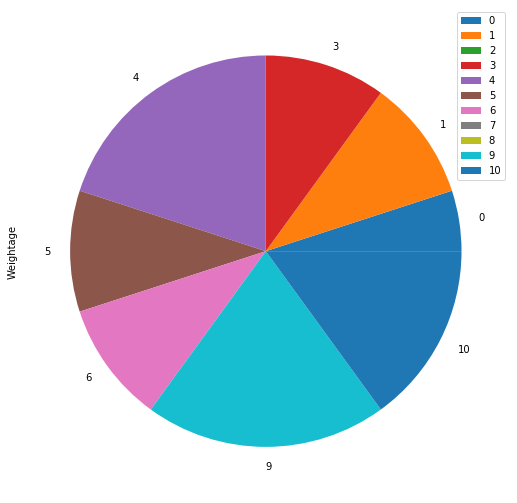

In [308]:
category.plot.pie(y='Weightage',figsize=(9,9))


In [224]:
tor_cat['Total']=0.0
ny_cat['Total']=0.0
wi=[0.05,0.1,0.0,0.1,-0.2,0.1,0.1,0.0,0.0,0.2,0.15]


In [225]:
ny_cat.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11,Total
0,Allerton,40.865788,-73.859319,0.5,0.0,0.0,14.0,1.0,1.5,0.0,0.0,0.0,3.5,0.0,0.0
1,Annadale,40.538114,-74.178549,0.0,0.0,0.0,5.5,1.0,1.0,0.0,0.0,0.0,1.5,1.0,0.0
2,Arden Heights,40.549286,-74.185887,0.0,0.0,0.0,4.5,0.0,2.0,0.0,0.5,0.0,3.0,1.5,0.0
3,Arlington,40.635325,-74.165104,0.0,0.0,0.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,3.5,0.0
4,Arrochar,40.596313,-74.067124,0.5,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,2.0,1.5,0.0


In [226]:
for i in range(tor_cat.shape[0]):
    tor_cat.iloc[i,12]=np.dot(wi,tor_cat.iloc[i,1:12])
for i in range(ny_cat.shape[0]):
    ny_cat.iloc[i,14]=np.dot(wi,ny_cat.iloc[i,3:14])

In [227]:
tor_cat.head()

,Neighborhood,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11,Total
0,"Adelaide,King,Richmond",2.0,0.0,0.0,19.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0,2.500
1,Agincourt,0.5,0.0,0.0,12.0,1.0,0.5,0.0,0.0,0.0,3.0,0.0,1.675
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.0,0.0,0.0,11.0,0.0,2.0,0.5,0.0,0.0,2.0,0.0,1.750
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.0,0.0,0.0,5.5,0.0,0.5,0.0,0.0,0.0,6.5,0.5,1.975
4,"Alderwood,Long Branch",0.0,0.0,0.0,5.0,1.0,4.0,0.0,0.0,0.0,7.0,0.5,2.175


In [228]:
ny_cat.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,cat__7,cat__8,cat__9,cat__10,cat__11,Total
0,Allerton,40.865788,-73.859319,0.5,0.0,0.0,14.0,1.0,1.5,0.0,0.0,0.0,3.5,0.0,2.075
1,Annadale,40.538114,-74.178549,0.0,0.0,0.0,5.5,1.0,1.0,0.0,0.0,0.0,1.5,1.0,0.900
2,Arden Heights,40.549286,-74.185887,0.0,0.0,0.0,4.5,0.0,2.0,0.0,0.5,0.0,3.0,1.5,1.475
3,Arlington,40.635325,-74.165104,0.0,0.0,0.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,3.5,1.725
4,Arrochar,40.596313,-74.067124,0.5,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,2.0,1.5,2.050


In [229]:
tor_tot=tor_cat[['Neighborhood','Total']]
ny_tot=ny_cat[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Total']]

In [230]:
tor_tot.head()

,Neighborhood,Total
0,"Adelaide,King,Richmond",2.500
1,Agincourt,1.675
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1.750
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1.975
4,"Alderwood,Long Branch",2.175


In [231]:
tor_tot=tor_tot.sort_values(['Total'],ascending=False)
ny_tot=ny_tot.sort_values(['Total'],ascending=False)

In [238]:
tor_tot.reset_index(drop=True,inplace=True)
ny_tot.reset_index(drop=True,inplace=True)

In [239]:
tor_tot.head()

,Neighborhood,Total
0,"Fairview,Henry Farm,Oriole",4.200
1,"Ryerson,Garden District",3.600
2,"Bathurst Manor,Downsview North,Wilson Heights",3.400
3,Queen's Park,3.325
4,St. James Town,3.300


In [240]:
ny_tot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Total
0,Bay Terrace,40.782843,-73.776802,4.45
1,Park Slope,40.672321,-73.977050,4.30
2,Soho,40.722184,-74.000657,4.00
3,Flatiron,40.739673,-73.990947,3.80
4,Midtown,40.754691,-73.981669,3.70


In [247]:
for i in range(tor_tot.shape[0]):
    if(tor_tot.iloc[i,0]=='Parkwoods'):
        break
print(i)

19


Considering the origin location of Parkwoods whose index is 19 in tor_tot

In [246]:
for i in range(ny_tot.shape[0]):
    if(ny_tot.iloc[i,3]<=tor_tot.iloc[19,1]):
        break
print(i,ny_tot.iloc[i,3])

97 2.45


In [248]:
ny_tot['Tollerance']=0

In [249]:
for i in range(ny_tot.shape[0]):
    ny_tot.iloc[i,4]=ny_tot.iloc[i,3]-tor_tot.iloc[19,1]

In [250]:
ny_tot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Total,Tollerance
0,Bay Terrace,40.782843,-73.776802,4.45,2.00
1,Park Slope,40.672321,-73.977050,4.30,1.85
2,Soho,40.722184,-74.000657,4.00,1.55
3,Flatiron,40.739673,-73.990947,3.80,1.35
4,Midtown,40.754691,-73.981669,3.70,1.25


In [257]:
cols=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Total','Tollerance']
ny_up=pd.DataFrame(columns=cols)
ny_same=pd.DataFrame(columns=cols)
ny_down=pd.DataFrame(columns=cols)


In [272]:
for i in range(ny_tot.shape[0]):
    #print(i)
    if(ny_tot.iloc[i,4]>0.0):
        #print('in up')
        ny_up=ny_up.append(ny_tot[i:i+1])
    elif(ny_tot.iloc[i,4]==0.0):
        #print('in same')
        ny_same=ny_same.append(ny_tot[i:i+1])
    elif(ny_tot.iloc[i,4]<0.0):
        #print('in down')
        ny_down=ny_down.append(ny_tot[i:i+1])
        

In [273]:
ny_up.shape

(97, 5)

In [274]:
ny_same.shape

(7, 5)

In [275]:
ny_down.shape

(202, 5)

In [285]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [286]:
import folium

In [287]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [288]:
from geopy.geocoders import Nominatim

In [289]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [292]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat,lng,neighborhood in zip(ny_up['Neighborhood Latitude'], ny_up['Neighborhood Longitude'], ny_up['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00FF00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork) 
    
for lat,lng,neighborhood in zip(ny_same['Neighborhood Latitude'], ny_same['Neighborhood Longitude'], ny_same['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#FFFF00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)    


for lat,lng,neighborhood in zip(ny_down['Neighborhood Latitude'], ny_down['Neighborhood Longitude'], ny_down['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)
map_newyork